# menentukan jumlah cluster optimal menggunakan elbow method

In [ ]:
!pip install scikit-learn-extra
import pandas as pd
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import time
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.4 MB/s eta 0:00:00


In [ ]:
# dataset pencurian kendaraan
df = pd.read_csv('/content/menghapus_anomaly.csv')
df.head()

,Id,Tanggal Kejadian,Waktu Kejadian,Alamat Kejadian,Latitude,Longitude,Jenis Kendaraan R,jam,Tanggal,Bulan,Tahun,hari
0,1,13/01/2023,1350,"JL. PH. H. MUSTOPA NO.31, KOTA BANDUNG KEL PAD...",-6.899781,107.644289,0,22,13,1,2023,Jumat
1,2,21/01/2023,390,"JL. SIDOMUKTI NO 11, KEL. SUKALUYU, KEC. CIBEU...",-6.895089,107.628508,0,6,21,1,2023,Sabtu
2,3,21/01/2023,390,"JL. SIDOMUKTI NO 11, KEL. SUKALUYU, KEC. CIBEU...",-6.895089,107.628508,0,6,21,1,2023,Sabtu
3,4,21/01/2023,1230,"JL. CIGADUNG RAYA TENGAH NO.28, KEL. CIGADUNG ...",-6.883221,107.630975,0,20,21,1,2023,Sabtu
4,5,25/01/2023,1380,"JL. CIGADUNG RAYA TIMUR, KEL. CIGADUNG KEC. CI...",-6.884179,107.632519,1,23,25,1,2023,Rabu


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 

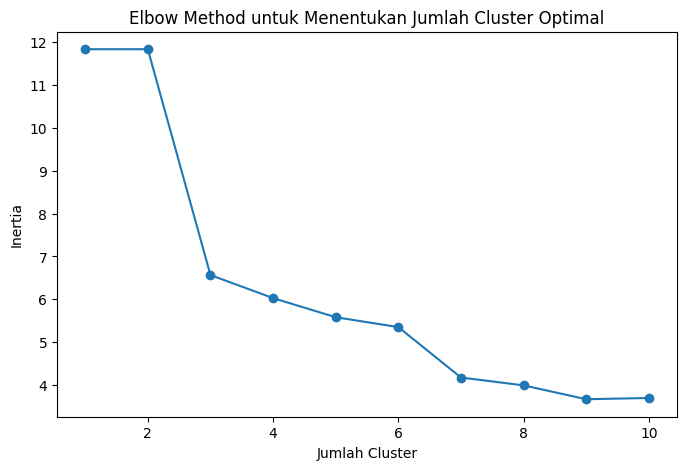

In [ ]:
# Batas geografis Kota Bandung (latitude dan longitude)
min_latitude = -6.973
max_latitude = -6.850S
min_longitude = 107.560
max_longitude = 107.720

# Filter data berdasarkan batas geografis
df = df[(df['Latitude'] >= min_latitude) & (df['Latitude'] <= max_latitude) &
        (df['Longitude'] >= min_longitude) & (df['Longitude'] <= max_longitude)]


# df adalah dataframe yang sudah diproses
X = df[['Latitude', 'Longitude']]

range_n_clusters = list(range(1, 11))
inertias = []

for n_clusters in range_n_clusters:
    kmedoids = KMedoids(n_clusters=n_clusters, metric='manhattan', random_state=42)
    kmedoids.fit(X)
    inertias.append(kmedoids.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertias, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


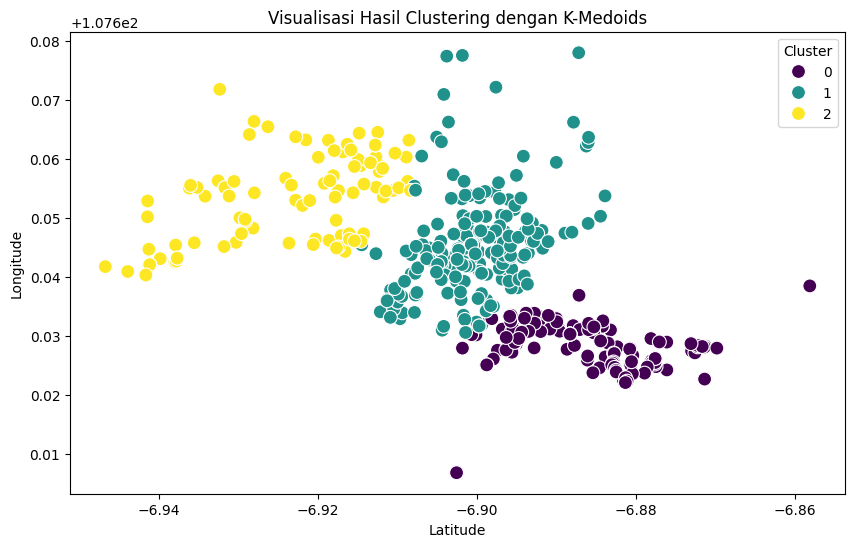

Jumlah data dalam setiap cluster:
cluster
1    277
2    144
0    141
Name: count, dtype: int64


In [ ]:
# Mengimplementasikan clustering dengan jumlah cluster optimal
optimal_clusters = 3  # Sesuaikan dengan hasil elbow method
kmedoids = KMedoids(n_clusters=optimal_clusters, metric='manhattan', random_state=42)
df['cluster'] = kmedoids.fit_predict(X)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitude', y='Longitude', hue='cluster', data=df, palette='viridis', s=100)
plt.title('Visualisasi Hasil Clustering dengan K-Medoids')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Cluster')
plt.show()

# Menampilkan jumlah data dalam setiap cluster
cluster_counts = df['cluster'].value_counts()
print("Jumlah data dalam setiap cluster:")
print(cluster_counts)

In [ ]:
# Ekspor dataFrame hasil preprocessing ke file CSV
df.to_csv('hasil_elbow_method.csv', index=False)
print("Data telah diekspor ke hasil_elbow_method.csv")

Data telah diekspor ke hasil_elbow_method.csv


# eucidean distance

Jumlah data dalam setiap cluster:
cluster
2    266
1    150
0    146
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


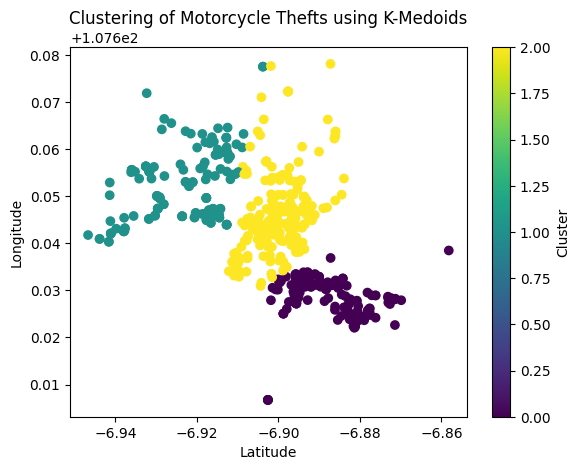

In [ ]:
# Menghitung matriks jarak Euclidean
distance_matrix = pairwise_distances(X, metric='euclidean')

# Tentukan jumlah cluster k yang diinginkan
k = 3  # ganti dengan jumlah cluster yang diinginkan

# Inisialisasi dan fit model K-Medoids
kmedoids = KMedoids(n_clusters=k, metric='precomputed', random_state=42)
kmedoids.fit(distance_matrix)

# Mendapatkan label cluster
labels = kmedoids.labels_

# Menambahkan label cluster ke dataframe
df['cluster'] = labels

plt.scatter(df['Latitude'], df['Longitude'], c=df['cluster'], cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustering of Motorcycle Thefts using K-Medoids')
cluster_counts = df['cluster'].value_counts()
print("Jumlah data dalam setiap cluster:")
print(cluster_counts)
plt.colorbar(label='Cluster')
plt.show()